In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns
from pandas_datareader import data as pdr
import yfinance as yfin #workaround as pandas_datareader is not working on yahoo today
yfin.pdr_override()
import matplotlib.pyplot as plt

In [25]:
url = "https://www.fundsexplorer.com.br/ranking"
r = requests.get(url)
df_list = pd.read_html(r.text)
df = df_list[0]
df.shape


(250, 26)

In [26]:
# Verificar quantas colunas possuem dados nulos
# df.isnull().sum()

In [27]:
df = df.replace(np.nan,0)
df = df.drop(columns=['DYPatrimonial','VariaçãoPatrimonial','Rentab. Patr.no Período',
                    'Rentab. Patr.Acumulada','VacânciaFinanceira','DY Ano','DividendYield','DY (3M)Média','DY (6M)Média',
                    'DY (3M)Acumulado',	'DY (6M)Acumulado','DY (12M)Acumulado','DY (12M)Média'])

In [28]:
dfColunas = []
naoNumColunas = ['Códigodo fundo','Setor']
for coluna in df:
    if coluna in naoNumColunas:
        pass
    else:
        dfColunas.append(coluna)       

In [29]:
for colunas in dfColunas:
    df[colunas] = [str(x).replace("R$ ","").replace("%","").replace(".","").replace(",",".") for x in df[colunas]]
    df[colunas] = [pd.to_numeric(x) for x in df[colunas]]

In [30]:
# Ajustando VPA para as cadas decimais corretas
df['P/VPA'] = df['P/VPA'] / 1000

In [31]:
def filtroDF(quantidadeAtivos=9, liquidezDiaria=1000,PVPA=1.2,VacânciaFísica=10):
# Filtrando para tirar FII's com alto risco
        # Com mais de 5 ativos. Casos menores do que esse aumentam o risco pela baixa pulverização
        dataFrame = df[(df['QuantidadeAtivos'] > quantidadeAtivos) & 
        # Liquidez diária superior a 1000
                (df['Liquidez Diária'] > liquidezDiaria) &
        # P/VPA até Máximo 1,2 (20% a mais do que o patrimonio)
                (df['P/VPA'] < PVPA) &
        # Vacância inferior a 10% do território
                (df['VacânciaFísica'] < VacânciaFísica)]
        return dataFrame
        
df = filtroDF()

In [32]:
testing = []
listingCarlos = ['BTLG11','HGRY11','VILG11','HSML11','HGBS11','XPML11','KNRI11','HGRE11','HGLG11']
for i in df['Códigodo fundo']:
    if i in listingCarlos:
        testing.append(i)
testing        

['XPML11', 'VILG11', 'HGLG11', 'HGBS11', 'BTLG11']

In [59]:
# Ordernar por critérios de maior importância (na minha opinião)
df = df.sort_values(by=['PatrimônioLíq.'], ascending = False)

# Formatar para remover Notação Científica do Patrimônio Líquido
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.display.float_format = '{:,.2f}'.format
df

,Códigodo fundo,Setor,Preço Atual,Liquidez Diária,Dividendo,Variação Preço,Rentab.Período,Rentab.Acumulada,PatrimônioLíq.,VPA,P/VPA,VacânciaFísica,QuantidadeAtivos
162,XPLG11,Logística,102.75,569360,0.62,3.84,4.43,-6.15,"2,995,509,280.00",110.53,0.93,9.90,13
119,HGLG11,Logística,165.84,359560,1.10,0.22,0.87,-1.82,"2,698,581,152.00",146.37,1.13,7.80,17
166,HGRU11,Híbrido,115.01,391930,0.72,2.94,3.56,-2.48,"2,163,633,460.00",117.55,0.98,0.00,16
129,HGBS11,Shoppings,191.50,76470,0.65,-1.15,-0.82,-6.26,"2,131,346,005.00",213.13,0.90,8.30,17
37,XPML11,Shoppings,102.72,263610,0.52,1.94,2.44,-2.73,"1,915,805,395.00",105.22,0.98,5.20,13
95,VILG11,Logística,110.29,333290,0.61,6.02,6.58,-1.21,"1,712,539,409.00",114.19,0.97,0.40,15
144,VISC11,Shoppings,106.17,290830,0.50,4.49,4.95,-1.82,"1,705,672,539.00",119.52,0.89,8.30,15
149,BRCO11,Logística,103.77,160440,0.57,6.27,6.84,-3.14,"1,602,620,953.00",108.44,0.96,5.90,10
219,BTLG11,Logística,109.71,433300,0.74,-3.49,-2.84,-2.74,"1,545,897,003.00",101.51,1.08,0.00,15
54,BBPO11,Lajes Corporativas,112.83,121920,1.08,0.24,1.18,7.13,"1,530,160,087.00",96.12,1.17,0.00,64


In [34]:
df['Setor'].value_counts()

Logística             7
Outros                5
Shoppings             3
Híbrido               2
Lajes Corporativas    1
Name: Setor, dtype: int64

In [35]:
df['Preço Atual'].mean()

110.73055555555555

In [36]:
# Cotação de cada empresa
df_ibov = pdr.get_data_yahoo("GSFI11.SA", start="2020-02-18", end="2021-07-07")
df_ibov = df_ibov[['Open','Close','Volume']]
df_ibov

[*********************100%***********************]  1 of 1 completed


,Open,Close,Volume
Date,,,
2020-02-18,4.60,4.58,465
2020-02-19,4.50,4.45,10637
2020-02-20,4.49,4.47,1473
2020-02-21,4.55,4.51,2995
2020-02-27,4.29,4.26,1019
...,...,...,...
2021-06-30,5.29,5.37,335005
2021-07-01,5.37,5.35,3194
2021-07-02,5.35,5.43,5054


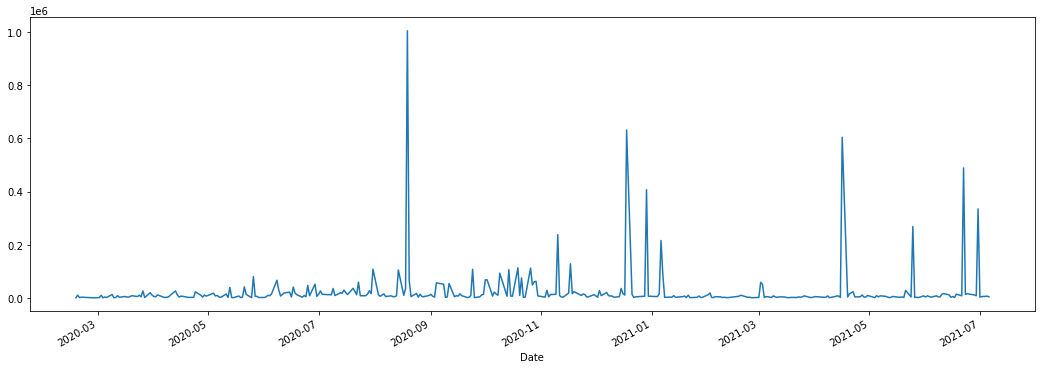

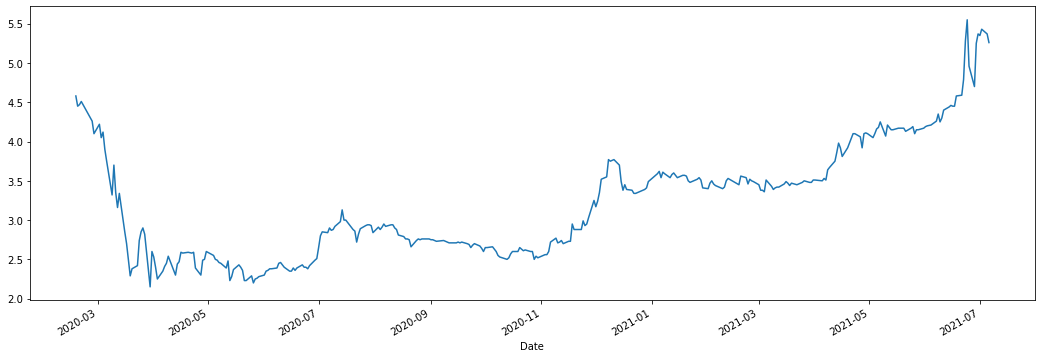

In [37]:
# plt.figure(figsize=(14,6))
plt.figure(figsize=(18,6))
df_ibov['Volume'].plot()
plt.show()

plt.figure(figsize=(18,6))
df_ibov['Close'].plot()
plt.show()



<AxesSubplot:>

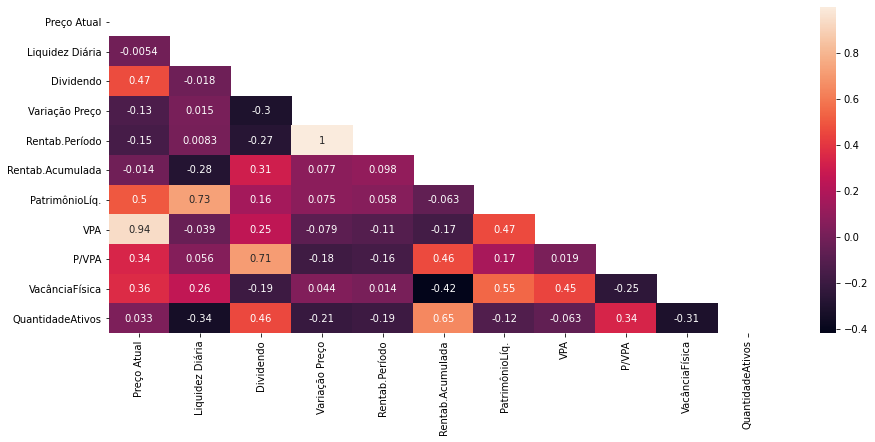

In [38]:
plt.figure(figsize=(15,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True, mask=mask)

In [39]:
# Criar um loop for para salvar todas as cotações em uma tabela
# Plotar adj close relativo